# NYC High School Directory – Data Exploration

**Author:** Lars Petschke

**Date:**   09/17/2025



## 0. Load and Preview Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('day_2_datasets/high-school-directory.csv')

# Preview the first few rows
df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


---

## 1. Data Cleaning

In a first step I standardize column names to make analysis easier and more consistent.


In [2]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('[^a-z0-9_]', '', regex=True)
)
df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


## 2. Handling Missing Values

Before analysis, I check which columns have missing values and decide how to handle them.

- For this project, I focus on columns needed for our questions: `dbn`, `borough`, `total_students`, `grade_span_min`, and `grade_span_max`.
- For analyses that require these columns, I will **drop rows with missing values** only when necessary.
- For other columns, missing values are ignored.

Following I inspect the relevant columns:


In [3]:
# Show missing values for key columns
key_columns = ['dbn', 'borough', 'total_students', 'grade_span_min', 'grade_span_max']
mv = df[key_columns].isnull().sum()
print("Missing values in key columns:")
print(mv)
print("Only {} rows have missing values in any of these columns.".format(df[key_columns].isnull().any(axis=1).sum()))

Missing values in key columns:
dbn               0
borough           0
total_students    9
grade_span_min    3
grade_span_max    0
dtype: int64
Only 12 rows have missing values in any of these columns.


For the key columns, the amount of missing data is low and will not affect the results.  
When filtering or grouping, I will drop rows with missing values in the relevant columns as needed.


## 3. Filter: Schools in Brooklyn

Filter the dataset to include only schools located in Brooklyn.


In [4]:
brooklyn_schools = df[df['borough'] == 'Brooklyn']
brooklyn_schools.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


## 4. Key Questions & Answers

Following I will answer the questions.

In [5]:
# How many total schools are in Brooklyn? 
brkln_schools = brooklyn_schools['dbn'].nunique()
print(f'There are {brkln_schools} schools in Brooklyn.')

There are 121 schools in Brooklyn.


In [6]:
# How many Brooklyn schools offer Grade 9 entry?

# For grade 9 analysis, drop rows with missing grade_span_min or grade_span_max
brooklyn_schools_clean = brooklyn_schools.dropna(subset=['grade_span_min', 'grade_span_max'])

brooklyn_grade9 = brooklyn_schools_clean[
    (brooklyn_schools_clean['grade_span_min'].astype(str).str.contains('9')) |
    (brooklyn_schools_clean['grade_span_max'].astype(str).str.contains('9'))
]

brkln_grd_9 = brooklyn_grade9['dbn'].nunique()

print(f'There are {brkln_grd_9} Brooklyn schools that offer Grade 9 entry.')


There are 99 Brooklyn schools that offer Grade 9 entry.


## 5. Grouped Summaries & Statistics

In [7]:
# Unique school count per borough
unique_school_counts = df.groupby('borough')['dbn'].nunique()
print("Unique schools per")
print(unique_school_counts)

Unique schools per
borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64


In [8]:
# Average number of students per borough
avg_students = df.groupby('borough')['total_students'].mean().round(1)
print("Average number of students per")
print(avg_students)


Average number of students per
borough
Bronx             490.4
Brooklyn          699.1
Manhattan         589.8
Queens           1046.6
Staten Island    1847.5
Name: total_students, dtype: float64


In [9]:
# Summary statistics for grade_span_max grouped by borough
grade_span_summary = df.groupby('borough')['grade_span_max'].describe().T.round(1)
print("Grade span max summary by borough:")
print("----------------------------------")
print(grade_span_summary)

Grade span max summary by borough:
----------------------------------
borough  Bronx  Brooklyn  Manhattan  Queens  Staten Island
count    118.0     121.0      106.0    80.0           10.0
mean      11.9      11.9       11.9    11.8           12.0
std        0.4       0.4        0.5     0.5            0.0
min        9.0       9.0        9.0    10.0           12.0
25%       12.0      12.0       12.0    12.0           12.0
50%       12.0      12.0       12.0    12.0           12.0
75%       12.0      12.0       12.0    12.0           12.0
max       12.0      12.0       12.0    12.0           12.0


## 6. Visualizations

I visualize the number of schools per borough and the distribution of student numbers.


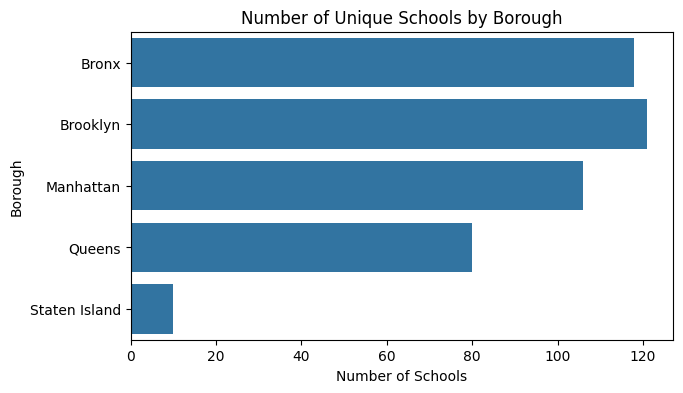

In [10]:
# Bar chart: Number of unique schools per borough
plt.figure(figsize=(7, 4))
sns.barplot(x=unique_school_counts.values, y=unique_school_counts.index)
plt.title('Number of Unique Schools by Borough')
plt.xlabel('Number of Schools')
plt.ylabel('Borough')
plt.show()



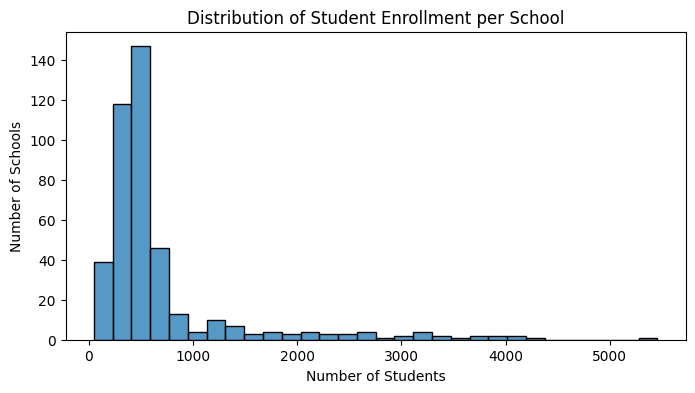

In [11]:
# Histogram: Distribution of total students per school
plt.figure(figsize=(8, 4))
sns.histplot(df['total_students'].dropna(), bins=30)
plt.title('Distribution of Student Enrollment per School')
plt.xlabel('Number of Students')
plt.ylabel('Number of Schools')
plt.show()


## 7. Key Insights

- Brooklyn has the highest number of unique schools among all boroughs.
- The majority of Brooklyn high schools offer entry at Grade 9.
- There is significant variation in average school size and grade span across boroughs.
- The student population distribution is right-skewed: most schools are small, but a few enroll over 2,000 students.


## 8. Conclusions

The analysis highlights Brooklyn's leading role in NYC high school education, both in quantity and grade 9 accessibility. Variations in school size and grade offerings reflect the diversity of educational opportunities in New York City. 